In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import pandas as pd

2023-05-24 20:12:58.901698: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 20:12:58.950727: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 20:12:58.951580: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 20:12:59.843395: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
train_data=pd.read_csv('fashion-mnist_train.csv')
test_data=pd.read_csv('fashion-mnist_test.csv')

In [17]:
x_train_array=train_data.values[:,1:]
x_test_array=test_data.values[:,1:]

In [18]:
x_train=x_train_array.reshape(-1, 28, 28, 1) / 255.0
x_test=x_test_array.reshape(-1, 28, 28, 1) / 255.0

In [21]:
y_train=tf.keras.utils.to_categorical(train_data.label, 10)
y_test=tf.keras.utils.to_categorical(test_data.label, 10)

In [23]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


2023-05-20 13:07:29.874311: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-20 13:07:29.949329: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

2023-05-20 13:08:17.279886: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 26s 14ms/step - loss: 0.4741 - accuracy: 0.8298 - val_loss: 0.3581 - val_accuracy: 0.8661


In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3581 - accuracy: 0.8661
Test Loss: 0.3580724596977234
Test Accuracy: 0.866100013256073


In [27]:
num_images = 5
random_indices = np.random.choice(range(len(x_test)), num_images)

In [28]:
predictions = model.predict(x_test[random_indices])
predicted_classes = np.argmax(predictions, axis=1)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

1/1 [==============================] - 0s 116ms/step


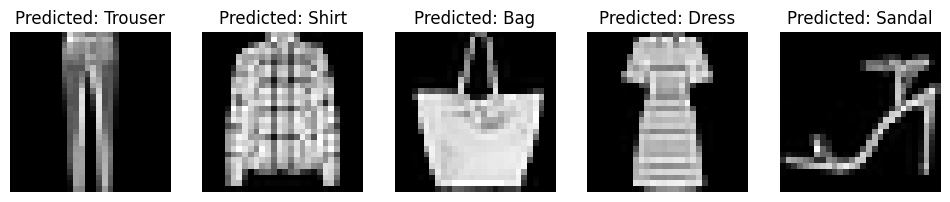

In [29]:
plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_labels[predicted_classes[i]]}")
    plt.axis('off')

plt.show()